In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import numpy.polynomial.polynomial as poly

In [3]:
from numpyarray_to_latex.jupyter import to_jup
from numpyarray_to_latex import to_ltx



from matplotlib.pyplot import figure

In [4]:
from numpy.polynomial import Polynomial

In [5]:
r=0.1
f  = np.exp(-r)



In [6]:
def regression(X,Y,deg):
    z = np.linspace(-3000,3000)
    coefs = poly.polyfit(X, Y, deg)
    ffit = poly.polyval(z, coefs)
    plt.plot(z, ffit)
    plt.scatter(X,Y)
    plt.show()
    return coefs
    

In [7]:
# t=2

In [8]:
Y=np.array((11*f,35*f))
X= np.array((50,50))

In [9]:
Z=np.polyfit(X,Y,2)
Z

c:\users\administrator\appdata\local\programs\python\python39\lib\site-packages\IPython\core\interactiveshell.py:3398: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


array([2.77483475e-03, 1.38741737e-01, 6.93708687e+00])

c:\users\administrator\appdata\local\programs\python\python39\lib\site-packages\numpy\polynomial\polynomial.py:1362: RankWarning: The fit may be poorly conditioned
  return pu._fit(polyvander, x, y, deg, rcond, full, w)


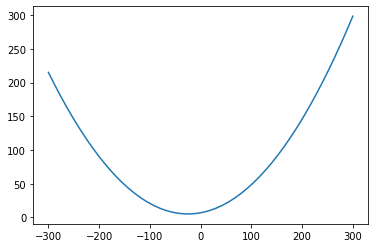

In [10]:
z = np.linspace(-300,300)
coefs = poly.polyfit(X, Y, 2)
ffit = poly.polyval(z, coefs)
plt.plot(z, ffit)

plt.show()

In [11]:
#val 
def f_test(x):
    return -1.070+2.983*x-1.813*x**2


In [12]:
def continuation(x,coefs):
    ffit = poly.polyval(x, coefs)
    return ffit
continuation(50,coefs)
    

20.811260614827074

In [13]:
# t=1


In [14]:
X=np.array([0*f,0*f,25*f,25*f])
Y= np.array([64 for i in range(4)])
print('X:',X)
print('Y:',Y)

X: [ 0.          0.         22.62093545 22.62093545]
Y: [64 64 64 64]


c:\users\administrator\appdata\local\programs\python\python39\lib\site-packages\numpy\polynomial\polynomial.py:1362: RankWarning: The fit may be poorly conditioned
  return pu._fit(polyvander, x, y, deg, rcond, full, w)


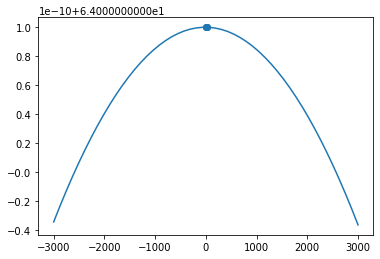

array([ 6.40000000e+01, -3.40336899e-16, -1.50452177e-17])

In [15]:
regression(X,Y,2)

In [16]:
# ls en tant discret:
T= 3 # l'intervalle de temps
N=8 # nombre de chemin 
K = 75 #  le strike

S = np.array([[80,100,125,150],
             [80,100,125,100],
             [80,100,80,100],
              [80,100,80,64],
              [80,64,80,100],
              [80,64,80,64],
              [80,64,50,64],
              [80,64,50,40]])

In [17]:
to_jup(S)

<IPython.core.display.Math object>

In [18]:
# Cahs flow matrice à t=3

In [19]:
CS = np.zeros((N,T+1))
for t in range(T+1):
    
    CS[:,t] = [max(K-s,0) for s in S[:,t] ]



In [20]:
to_jup(CS)

<IPython.core.display.Math object>

In [21]:
X = S[:,2]
Y= f*CS[:,3]
Z = np.array((Y,X)).T
to_jup(Z,
      mark_elements=[(6,0),(7,0),(6,1),(7,1)])

<IPython.core.display.Math object>

In [22]:
# calcul de l'espérance de continuation à t=2

condition = np.maximum(K - Z[:, 1], 0) > 0
Z[condition]
Z_r = Z[condition]
to_jup(Z_r)

<IPython.core.display.Math object>

on cherche a, b, et c tels que 
E[Y/X] = aX**2+bX+C

par regression linéaire on a

In [23]:
to_jup(Z_r.T[1])

<IPython.core.display.Math object>

c:\users\administrator\appdata\local\programs\python\python39\lib\site-packages\numpy\polynomial\polynomial.py:1362: RankWarning: The fit may be poorly conditioned
  return pu._fit(polyvander, x, y, deg, rcond, full, w)


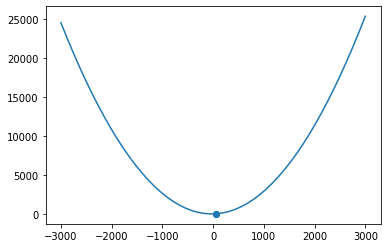

In [24]:
coefs = regression(Z_r.T[1],Z_r.T[0],2)

In [25]:
print(to_ltx(coefs))

\left(
\begin{array}{}
  6.9371 &  0.1387 &  0.0028
\end{array}
\right)


In [26]:
OE2 = np.zeros((N,2))
OE2[:,0] = CS[:,2]
OE2[:,1] = [continuation(x,coefs)  if max(K-x,0)>0  else 0 for x in S[:,2] ]
to_jup(OE2)

<IPython.core.display.Math object>

on obtien la cash flow matrice  à  t=2

In [27]:
CS2 = np.zeros((N,T))
CS2[:,1] =  np.where(OE2[:, 0] > OE2[:, 1], OE2[:, 0], 0)
CS2[:,2] =  np.where(CS2[:,1]>0, 0, CS[:,3])
to_jup(CS2)

<IPython.core.display.Math object>

In [28]:
11*f


9.953211598395555

In [29]:
# regression à T=1
X = S[:,1]
Y= f*CS2[:,1]
Z = np.array((Y,X)).T
to_jup(Z,mark_elements=[(4,0),(4,1),(5,0),(5,1),(6,0),(6,1),(7,0),(7,1)])

<IPython.core.display.Math object>

In [30]:
# calculde l'esperance de continuation  à t=1
condition = np.maximum(K - Z[:, 1], 0) > 0
Z[condition]
Z_r = Z[condition]
to_jup(Z_r)

<IPython.core.display.Math object>

on cherche a, b, et c tels que E[Y/X] = aX**2+bX+C

par regression linéaire on a

c:\users\administrator\appdata\local\programs\python\python39\lib\site-packages\numpy\polynomial\polynomial.py:1362: RankWarning: The fit may be poorly conditioned
  return pu._fit(polyvander, x, y, deg, rcond, full, w)


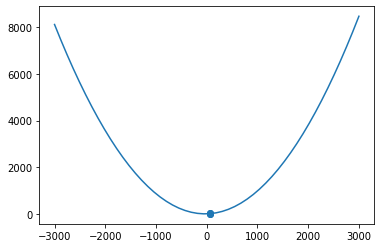

In [31]:
coefs = regression(Z_r.T[1],Z_r.T[0],2)

In [32]:
to_jup(coefs.T)

<IPython.core.display.Math object>

In [33]:
OE1 = np.zeros((N,2))
OE1[:,0] = CS[:,1]
OE1[:,1] = [continuation(x,coefs)  if max(K-x,0)>0  else 0 for x in S[:,1] ]
to_jup(OE1)

<IPython.core.display.Math object>

In [34]:
CS3 = np.zeros((N,T))
CS3[:,0] =  np.where(OE1[:, 0] > OE1[:, 1], OE1[:, 0], 0)
CS3[:,1] =  np.where(CS3[:, 0] > 0, 0, CS[:,2])
CS2[:,2] =  np.where(CS2[:,2]>0, 0, CS[:,3])
to_jup(CS3)

<IPython.core.display.Math object>

In [35]:
CS3_actu = np.array([CS3[:,0]*f,CS3[:,1]*f**2,CS3[:,2]*f**3]).T
to_jup(CS3_actu)

<IPython.core.display.Math object>

In [36]:
price = np.sum(CS3_actu,axis=1).sum()/N

In [37]:
np.sum(CS3,axis=1).sum()/N*f

5.655233862724747

In [38]:
print('price = ', price)

price =  5.117067206737386


In [39]:
r=6/100
#T=3

S = np.array([[80, 100, 125, 150],
              [80, 100, 125, 100],
              [80, 100, 80, 100],
              [80, 100, 80, 64],
              [80, 64, 80, 100],
              [80, 64, 80, 64],
              [80, 64, 50, 64],
              [80, 64, 50, 40]])


S = np.array([[1, 1.09, 1.08, 1.34],
              [1, 1.16, 1.26, 1.54],
              [1, 1.22, 1.07, 1.03],
              [1, 0.93, 0.97, 0.92],
              [1, 1.11, 1.56, 1.52],
              [1, 0.76, 0.77, 0.90],
              [1, 0.92, 0.84, 1.01],
              [1, 0.88, 1.22, 1.34]]).T

T = S.shape[1]  # Number of time steps
N = S.shape[0]  # Number of paths

# Step 1: Define the option payoff function
def option_payoff(S):
    return np.maximum(1.10 - S, 0)

# Step 2: Perform backward induction
V = option_payoff(S[:, -1])  # Initialize option values at maturity

for t in range(T - 2, -1, -1):
    X = S[:, t]  # Current prices
    Y = V * np.exp(-r*(T-t))  # Discounted future values
    to_jup(np.array((Y,X)).T)
    basis_functions = np.column_stack((np.ones(N), X, X ** 2))  # Basis functions for regression
    coefficients = np.linalg.lstsq(basis_functions, Y, rcond=None)[0]  # Regression coefficients
    print("Regression coefficients")
    to_jup(coefficients)
    continuation_value = basis_functions.dot(coefficients)  # Estimated continuation value
    exercise_value = option_payoff(X)  # Option payoff at current prices
    V = np.maximum(continuation_value, exercise_value)  # Update option values
    
    print(t)

# Step 3: Calculate the present value
PV = np.mean(V) * np.exp(-r * T)
#PV = np.sum(V,axis=1).sum()/N
print("Estimated option value:", PV)


<IPython.core.display.Math object>

Regression coefficients


<IPython.core.display.Math object>

6


<IPython.core.display.Math object>

Regression coefficients


<IPython.core.display.Math object>

5


<IPython.core.display.Math object>

Regression coefficients


<IPython.core.display.Math object>

4


<IPython.core.display.Math object>

Regression coefficients


<IPython.core.display.Math object>

3


<IPython.core.display.Math object>

Regression coefficients


<IPython.core.display.Math object>

2


<IPython.core.display.Math object>

Regression coefficients


<IPython.core.display.Math object>

1


<IPython.core.display.Math object>

Regression coefficients


<IPython.core.display.Math object>

0
Estimated option value: 0.03638837389272912


In [40]:
#kd
"""S = np.array([[1, 1.09, 1.08, 1.34],
              [1, 1.16, 1.26, 1.54],
              [1, 1.22, 1.07, 1.03],
              [1, 0.93, 0.97, 0.92],
              [1, 1.11, 1.56, 1.52],
              [1, 0.76, 0.77, 0.90],
              [1, 0.92, 0.84, 1.01],
              [1, 0.88, 1.22, 1.34]]).T



T = S.shape[1]  # Number of time steps
N = S.shape[0]  # Number of paths

r = 6/100  # Interest rate

# Step 1: Define the option payoff function
def option_payoff(S):
    return np.maximum(1.10 - S, 0)

# Step 2: Perform backward induction
V = option_payoff(S[:, -1])  # Initialize option values at maturity

for t in range(T - 2, -1, -1):
    X = S[V > 0, t]  # Stock prices at time t for paths where option is in the money
    Y = V[V > 0] * np.exp(-r)  # Discounted future values for in-the-money paths
    to_jup(np.array((Y,X)).T)
    basis_functions = np.column_stack((np.ones(X.shape[0]), X, X ** 2))  # Basis functions for regression
    print(basis_functions)
    coefficients = np.linalg.lstsq(basis_functions, Y, rcond=None)[0]  # Regression coefficients
    print("Regression coefficients")
    to_jup(coefficients)
    continuation_value = basis_functions.dot(coefficients)  # Estimated continuation value
    print("continuation_value")
    print(continuation_value)
    exercise_value = option_payoff(X)  # Option payoff at current prices
    V[V > 0] = np.maximum(continuation_value, exercise_value)  # Update option values for in-the-money paths

# Step 3: Calculate the present value
PV = np.mean(V) * np.exp(-r * T)
print("Estimated option value:", PV)
"""
#kd

'S = np.array([[1, 1.09, 1.08, 1.34],\n              [1, 1.16, 1.26, 1.54],\n              [1, 1.22, 1.07, 1.03],\n              [1, 0.93, 0.97, 0.92],\n              [1, 1.11, 1.56, 1.52],\n              [1, 0.76, 0.77, 0.90],\n              [1, 0.92, 0.84, 1.01],\n              [1, 0.88, 1.22, 1.34]]).T\n\n\n\nT = S.shape[1]  # Number of time steps\nN = S.shape[0]  # Number of paths\n\nr = 6/100  # Interest rate\n\n# Step 1: Define the option payoff function\ndef option_payoff(S):\n    return np.maximum(1.10 - S, 0)\n\n# Step 2: Perform backward induction\nV = option_payoff(S[:, -1])  # Initialize option values at maturity\n\nfor t in range(T - 2, -1, -1):\n    X = S[V > 0, t]  # Stock prices at time t for paths where option is in the money\n    Y = V[V > 0] * np.exp(-r)  # Discounted future values for in-the-money paths\n    to_jup(np.array((Y,X)).T)\n    basis_functions = np.column_stack((np.ones(X.shape[0]), X, X ** 2))  # Basis functions for regression\n    print(basis_functions)

In [41]:
r=0.1
X = np.array(
    [
        [1.00, 1.09, 1.08, 1.34],
        [1.00, 1.16, 1.26, 1.54],
        [1.00, 1.22, 1.07, 1.03],
        [1.00, 0.93, 0.97, 0.92],
        [1.00, 1.11, 1.56, 1.52],
        [1.00, 0.76, 0.77, 0.90],
        [1.00, 0.92, 0.84, 1.01],
        [1.00, 0.88, 1.22, 1.34],
    ]
).T

print(X.shape)

X= np.array([
              [80, 100, 125, 150],
              [80, 100, 125, 100],
              [80, 100, 80, 100],
              [80, 100, 80, 64],
              [80, 64, 80, 100],
              [80, 64, 80, 64],
              [80, 64, 50, 64],
              [80, 64, 50, 40]
        ]
).T

X.shape


(4, 8)


(4, 8)

In [42]:
def exercise_value(s):
    return np.maximum(K - s, 0)

In [43]:
def fit(x, y):
    return Polynomial.fit(x, y, 2)

In [44]:
# code MIT

def backward_regression(fit, exercise_value, X, r):
    df = np.exp(-r)
    cashflow = exercise_value(X[-1, :])
    for i in reversed(range(1, X.shape[0] - 1)):
        cashflow = cashflow * df
        x = X[i, :]
        itm = exercise_value(x) > 0
        to_jup(np.array((x[itm], cashflow[itm])).T)
        
        coefs = poly.polyfit(x[itm], cashflow[itm], deg=2)
        print('coefs : ')
        to_jup(coefs)
        ffit = poly.polyval(x, coefs)
        #fitted = fit(x[itm], cashflow[itm])
        exercise = exercise_value(x)
        #continuation = fitted(x)
        continuation = ffit
        to_jup(continuation.T)
        
        ex_idx = itm & (exercise > continuation)
        cashflow[ex_idx] = exercise[ex_idx]
        
        yield cashflow, x, ffit, continuation, exercise, ex_idx

In [45]:
bw_regr_steps = list(backward_regression(fit, exercise_value, X, r))

<IPython.core.display.Math object>

coefs : 


c:\users\administrator\appdata\local\programs\python\python39\lib\site-packages\numpy\polynomial\polynomial.py:1362: RankWarning: The fit may be poorly conditioned
  return pu._fit(polyvander, x, y, deg, rcond, full, w)


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

coefs : 


<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [46]:
t = X.shape[0] - 2
for cashflow, x, fitted, continuation, exercise, ex_idx in backward_regression(
    fit, exercise_value, X, r
):
    print(f"Regression at t = {t}:")
    #print(np.round(fitted.convert(domain=[-1, 1]).coef, 3))
    print(np.round(continuation, 4))
    print(ex_idx)
    print(np.round(cashflow, 3))
    
    t = t - 1

<IPython.core.display.Math object>

coefs : 


<IPython.core.display.Math object>

<IPython.core.display.Math object>

Regression at t = 2:
[67.6366 67.6366 35.7954 35.7954 35.7954 35.7954 20.8113 20.8113]
[False False False False False False  True  True]
[ 0.     0.     0.     9.953  0.     9.953 25.    25.   ]


<IPython.core.display.Math object>

coefs : 


<IPython.core.display.Math object>

<IPython.core.display.Math object>

Regression at t = 1:
[22.621 22.621 22.621 22.621 13.562 13.562 13.562 13.562]
[False False False False False False False False]
[ 0.     0.     0.     9.006  0.     9.006 22.621 22.621]


In [47]:
assert np.average(cashflow) * np.exp(-r) >= np.average(
    exercise_value(X[-1, :]) * np.exp(-3 * r)
)

print(np.round(np.average(cashflow) * np.exp(-r), 4))
print(np.round(np.average(exercise_value(X[-1, :])) * np.exp(-3 * r), 4))

7.1543
6.297


In [48]:
S= np.array([
              [80, 100, 125, 150],
              [80, 100, 125, 100],
              [80, 100, 80, 100],
              [80, 100, 80, 64],
              [80, 64, 80, 100],
              [80, 64, 80, 64],
              [80, 64, 50, 64],
              [80, 64, 50, 40]
        ]
).T
S
S[:,0]

array([ 80, 100, 125, 150])

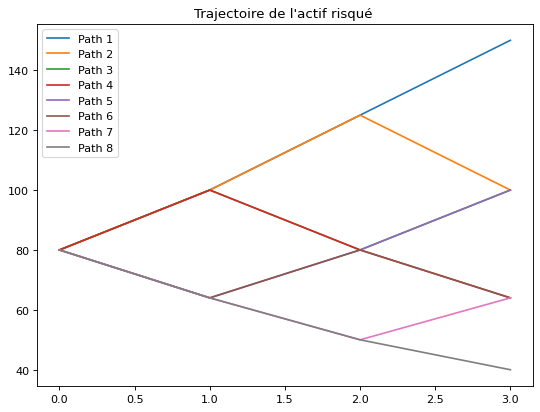

In [49]:
figure(figsize=(8, 6), dpi=80)
t = np.linspace(0, 3, 4)
#plt.plot(t,S)
plt.plot(t,S[:,0],label='Path 1')
plt.plot(t,S[:,1],label='Path 2')
plt.plot(t,S[:,2],label='Path 3')
plt.plot(t,S[:,3],label='Path 4')
plt.plot(t,S[:,4],label='Path 5')
plt.plot(t,S[:,5],label='Path 6')
plt.plot(t,S[:,6],label='Path 7')
plt.plot(t,S[:,7],label='Path 8')
plt.title("Trajectoire de l'actif risqué ")

plt.legend()
plt.show()

In [50]:
S

array([[ 80,  80,  80,  80,  80,  80,  80,  80],
       [100, 100, 100, 100,  64,  64,  64,  64],
       [125, 125,  80,  80,  80,  80,  50,  50],
       [150, 100, 100,  64, 100,  64,  64,  40]])

In [51]:
Z_r.T[0]

array([ 0.        ,  0.        , 22.62093545, 22.62093545])

In [56]:
((0.17+0.34+0.18+0.22)*np.exp(-6/100)+0.07*np.exp(-3*6/100))/8


0.1144343300450569

In [58]:
(2*11*np.exp(-0.1*3) +2*25*np.exp(-0.1*2))/8

7.154317313612111

In [53]:
9.01/f**2

11.004838851023132

In [54]:
\begin{equation}
\left(\begin{array}{llll}
- & - & 0.00 & 0.00 \\
- & - & 0.00 & 0.00 \\
- & - & 0.00 & 0.00 \\
- & - & 0.00 & 11.00 \\
- & - & 0.00 & 0.00 \\
- & - & 0.00 & 11.00 \\
- & - & 25.00 & 11.00 \\
- & - & 25.00 & 35.00
\end{array}\right)
\end{equation}

SyntaxError: unexpected character after line continuation character (4290760724.py, line 1)